In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
cj = np.loadtxt("/content/drive/MyDrive/cj121.txt",dtype=float,usecols=(0,1))
amp183 = np.loadtxt("/content/drive/MyDrive/9th-384-finit_change-amp.txt",dtype=float,usecols=(0,1))
amp02 = np.loadtxt("/content/drive/MyDrive/02amp9th256.txt",dtype=float,usecols=(0,1))
# Load the datasets
def load_data(file_paths):
    X = []
    y = []
    for file_path in file_paths:
        dataset = np.loadtxt(file_path)
        initial_amplitude = dataset[0, 1]  # Extract initial amplitude
        target_amplitudes = dataset[1:, 1]  # Remaining amplitudes
        X.append(initial_amplitude)
        y.append(target_amplitudes)

    X = np.array(X).reshape(-1, 1)  # Reshape X to be a 2D array with shape (n_samples, 1)

    # Find the maximum length of the sequences
    max_length = max(len(seq) for seq in y)

    # Pad sequences with zeros (or any other value you prefer)
    y_padded = np.array([np.pad(seq, (0, max_length - len(seq)), 'constant') for seq in y])

    return X, y_padded

# File paths
file_paths = [
    "/content/drive/MyDrive/cj121.txt",
    "/content/drive/MyDrive/9th-384-finit_change-amp.txt",
    "/content/drive/MyDrive/02amp9th256.txt"
]

# Load data
X, y = load_data(file_paths)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y.shape[1])  # Output layer predicts the sequence of amplitudes
])

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=500, batch_size=1, verbose=1)

# Evaluate the model (optional, since this is usually more relevant for classification)
loss = model.evaluate(X, y)
print(f"Loss: {loss:.4f}")

# Predict the sequence of amplitudes for a new initial amplitude
new_initial_amplitude = np.array([0.183]).reshape(-1, 1)  # Replace with your desired value
predicted_sequence = model.predict(new_initial_amplitude)

print(f"Predicted Sequence: {predicted_sequence}")


Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.8319
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1158 
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3204 
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0827 
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7725 
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0449 
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7351  
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2099  
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7581  
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2843 
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1055  
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0661 
Epoch 13/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8174  
Epoch 14/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9627
Epoch 15/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4673  
Epoch 16/500
3/3 ━━━━━━━━━

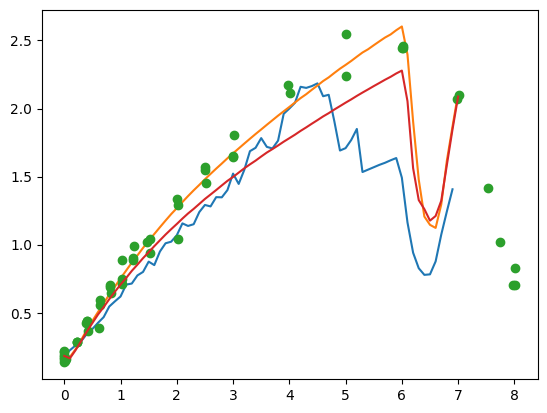

70


In [45]:
plt.plot(amp02[0:70,0],predicted_sequence[0])
plt.plot(amp02[:,0],amp02[:,1])
plt.plot(cj[:,0],cj[:,1],'o')
plt.plot(amp183[:,0],amp183[:,1])
plt.plot()
plt.show()
print(len(predicted_sequence[0]))